<a href="https://colab.research.google.com/github/yustiks/statistics_in_python/blob/master/statistics_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Итоговая работа

Анализ данных он-лайн магазина из Британии

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import requests
import seaborn as sns
from datetime import datetime
import dateutil.relativedelta
%matplotlib inline


In [2]:
data=pd.read_csv('data_retail.csv')
print(data.head())

   Unnamed: 0 InvoiceNo StockCode                     Description  Quantity  \
0           0    536365    84029E  RED WOOLLY HOTTIE WHITE HEART.         6   
1           1    536367     84879   ASSORTED COLOUR BIRD ORNAMENT        32   
2           2    536367     21755        LOVE BUILDING BLOCK WORD         3   
3           3    536368     22914    BLUE COAT RACK PARIS FASHION         3   
4           4    536373    84406B  CREAM CUPID HEARTS COAT HANGER         8   

    InvoiceDate UnitPrice  CustomerID         Country UnitPrice_1  
0  12/1/10 8:26      3,39     17850.0  United Kingdom        3,39  
1  12/1/10 8:34      1,69     13047.0  United Kingdom        1,69  
2  12/1/10 8:34      5,95     13047.0  United Kingdom        5,95  
3  12/1/10 8:34      4,95     13047.0  United Kingdom        4,95  
4  12/1/10 9:02      2,75     17850.0  United Kingdom        2,75  


Посмотрим на структуру данных

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 10 columns):
Unnamed: 0     54214 non-null int64
InvoiceNo      54214 non-null object
StockCode      54214 non-null object
Description    54080 non-null object
Quantity       54214 non-null int64
InvoiceDate    54214 non-null object
UnitPrice      54214 non-null object
CustomerID     40643 non-null float64
Country        54214 non-null object
UnitPrice_1    54214 non-null object
dtypes: float64(1), int64(2), object(7)
memory usage: 4.1+ MB


In [4]:
def missingdata(data):
    '''
    считаем кол-во и долю пропущеных значений
    '''
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    ms=pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    ms= ms[ms["Percent"] > 0]
    return ms

In [5]:
missingdata(data)

,Total,Percent
CustomerID,13571,25.032279
Description,134,0.247169


есть пропущенные значения в признаках Description - 0.2% и CustomerID - 25%
CustomerID - заполнить значением 9999999-для идентификации в анализе
Description - это описание товара, для принятия решения надо исследовать датасет

UnitPrice - надо заменить , на . в исходном файле

In [7]:
data = pd.read_csv('data_retail.csv', quotechar='"', decimal=",")
data.to_csv('data_retail_2.csv', sep=',', encoding='utf-8', quotechar='"', decimal='.')

In [9]:
data=pd.read_csv('data_retail_2.csv')

In [10]:
data.head()

,Unnamed: 0,Unnamed: 0.1,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,UnitPrice_1
0,0,0,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom,3.39
1,1,1,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/10 8:34,1.69,13047.0,United Kingdom,1.69
2,2,2,536367,21755,LOVE BUILDING BLOCK WORD,3,12/1/10 8:34,5.95,13047.0,United Kingdom,5.95
3,3,3,536368,22914,BLUE COAT RACK PARIS FASHION,3,12/1/10 8:34,4.95,13047.0,United Kingdom,4.95
4,4,4,536373,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 9:02,2.75,17850.0,United Kingdom,2.75


In [12]:
data.drop(data.iloc[:, [0]],axis=1, inplace = True)
data.drop(data.iloc[:, [0.1]],axis=1,inplace = True)

In [13]:
data.drop(data.iloc[:, [8]], axis=1, inplace = True)

In [14]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom
1,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/10 8:34,1.69,13047.0,United Kingdom
2,536367,21755,LOVE BUILDING BLOCK WORD,3,12/1/10 8:34,5.95,13047.0,United Kingdom
3,536368,22914,BLUE COAT RACK PARIS FASHION,3,12/1/10 8:34,4.95,13047.0,United Kingdom
4,536373,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 9:02,2.75,17850.0,United Kingdom


In [15]:
data['CustomerID'].fillna(99999999, inplace = True)

In [16]:
missingdata(data)

,Total,Percent
Description,134,0.247169


In [19]:
def date_by_date(dataset):
    dataset['InvoiceDate_date'] = dataset['InvoiceDate'].apply(
        lambda x: (datetime.strptime(x, '%m/%d/%y %H:%M'))) 

In [20]:
date_by_date(data)

In [21]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDate_date
0,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00
1,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/10 8:34,1.69,13047.0,United Kingdom,2010-12-01 08:34:00
2,536367,21755,LOVE BUILDING BLOCK WORD,3,12/1/10 8:34,5.95,13047.0,United Kingdom,2010-12-01 08:34:00
3,536368,22914,BLUE COAT RACK PARIS FASHION,3,12/1/10 8:34,4.95,13047.0,United Kingdom,2010-12-01 08:34:00
4,536373,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 9:02,2.75,17850.0,United Kingdom,2010-12-01 09:02:00


In [24]:
max(data['InvoiceDate_date'])

Timestamp('2011-12-09 12:50:00')

In [25]:
min(data['InvoiceDate_date'])

Timestamp('2010-12-01 08:26:00')

Большинство признаков - категориальные значения

In [22]:
object_columns = [i for i in data.columns if data[i].dtype.name == 'object']

In [23]:
data[object_columns].describe()

,InvoiceNo,StockCode,Description,InvoiceDate,Country
count,54214,54214,54080,54214,54214
unique,14877,3351,3401,14058,37
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,10/31/11 14:41,United Kingdom
freq,127,237,243,127,49602


За период c декабря 2010 по сентябрь 2011 года
оформлено 14 877 инвойсов, в одном инвойсе в среднем 4 позиции
3351 товаров
3401 уникальных описаний товарных позиций
37 стран поставки, 91 % - это Великобритания, что ожидаемо, т.к. магазин оттуда

Для дальнейшего анализа добавим колонку со значением день недели, час и сумма в деньгах 

In [26]:
def transaction_by_day(dataset):
    dataset['day_of_transaction'] = dataset['InvoiceDate'].apply(
        lambda x: (datetime.strptime(x, '%m/%d/%y %H:%M')).strftime('%w')) 

def transaction_by_hour(dataset):
    dataset['hour_of_transaction'] = dataset['InvoiceDate'].apply(
        lambda x: (datetime.strptime(x, '%m/%d/%y %H:%M')).strftime('%H')) 

In [27]:
transaction_by_hour(data)

In [28]:
transaction_by_day(data)

In [30]:
data['Sum_position'] = data['Quantity']*data['UnitPrice']

In [32]:
data.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDate_date,hour_of_transaction,day_of_transaction,Sum_position
0,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,08,3,20.34
1,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/10 8:34,1.69,13047.0,United Kingdom,2010-12-01 08:34:00,08,3,54.08
2,536367,21755,LOVE BUILDING BLOCK WORD,3,12/1/10 8:34,5.95,13047.0,United Kingdom,2010-12-01 08:34:00,08,3,17.85


Рассмотрим числовые признаки

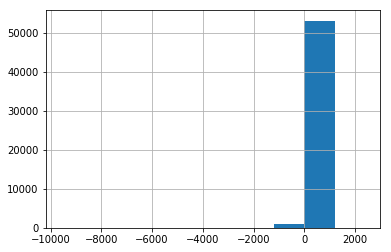

In [33]:
data['Quantity'].hist()

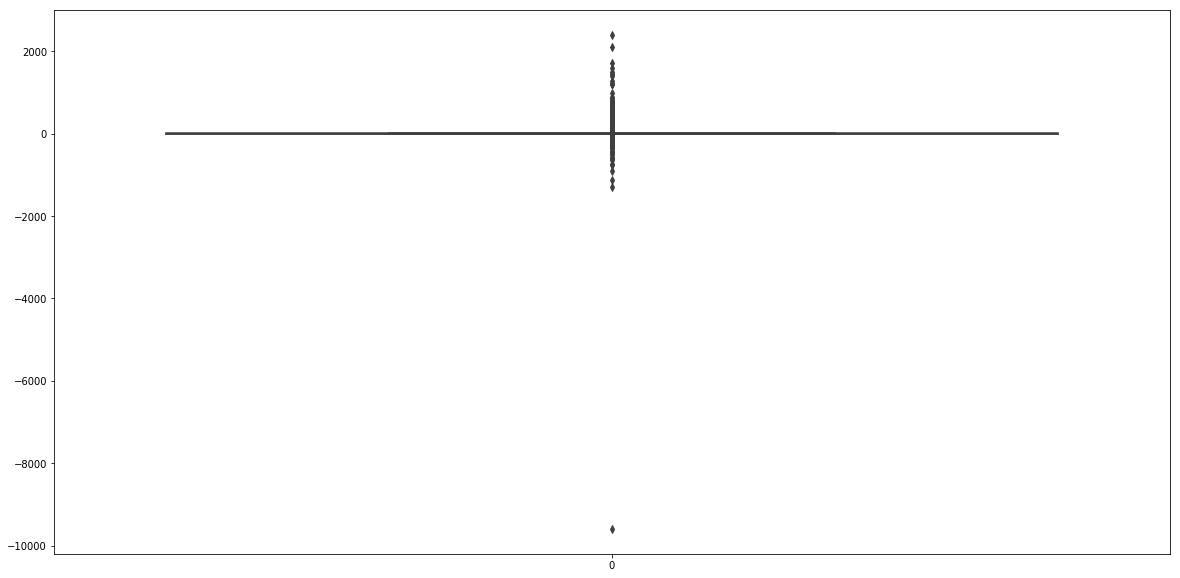

In [257]:
sns.boxplot(data=(data['Quantity']))
fig=plt.gcf()
fig.set_size_inches(20,10)
plt.show()

In [38]:
data['Quantity'].describe()

count    54214.000000
mean         9.610802
std         57.358422
min      -9600.000000
25%          1.000000
50%          3.000000
75%         10.000000
max       2400.000000
Name: Quantity, dtype: float64

У признака количество есть отрицательные значения. Будем считать, что это возвраты товара
Есть много выбросов по минимальному (отрицательному) и максимальному значениям - возможно это ошибки в данных, природу которых необходимо уточнять. Судя по медиане и квантилям - это мелкооптовый магазин и розница

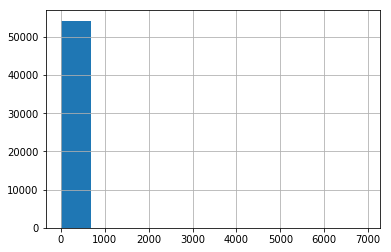

In [36]:
data['UnitPrice'].hist()

In [37]:
data['UnitPrice'].describe()

count    54214.000000
mean         4.307341
std         47.834496
min          0.000000
25%          1.250000
50%          2.080000
75%          4.130000
max       6930.000000
Name: UnitPrice, dtype: float64

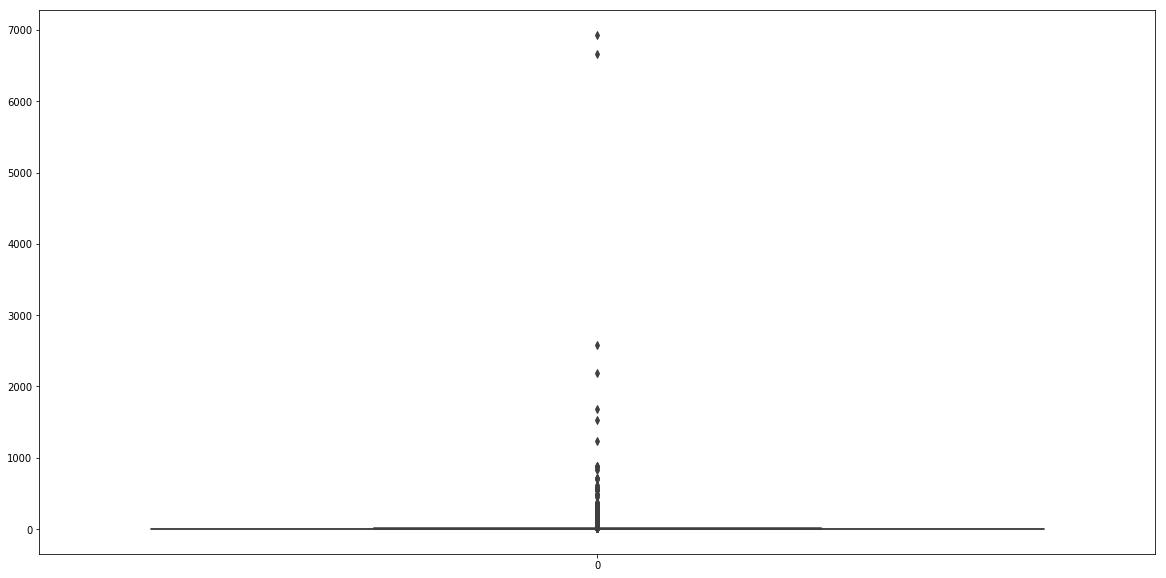

In [256]:
sns.boxplot(data=(data['UnitPrice']))
fig=plt.gcf()
fig.set_size_inches(20,10)
plt.show()

есть цена 0, посмотрим, что это за товары по их описанию

In [41]:
price = (data[data['UnitPrice'] == 0]['Description'].value_counts())/(data['Description'].value_counts())
price.sort_values(ascending = False).head()

wrongly sold as sets    1.0
found                   1.0
damages                 1.0
damaged                 1.0
counted                 1.0
Name: Description, dtype: float64

In [46]:
price[price >0.3]

?                                      1.000000
??                                     1.000000
AMAZON                                 1.000000
Adjustment                             1.000000
Amazon                                 1.000000
Damaged                                1.000000
Damages                                1.000000
FOUND                                  1.000000
Found                                  1.000000
RETRO "TEA FOR ONE"                    0.333333
Unsaleable, destroyed.                 1.000000
adjustment                             1.000000
check                                  1.000000
counted                                1.000000
damaged                                1.000000
damages                                1.000000
dotcom sales                           1.000000
found                                  1.000000
had been put aside                     1.000000
historic computer difference?....se    1.000000
lost in space                          1

Там где отсутствует цена - это либо ошибки в работе или некорректный ввод данных в систему
Проверим пропущенных значения для Description

In [48]:
data[data['Description'].isnull()].sum()['UnitPrice']

0.0

In [50]:
data[data['Description'].isnull()].sum()['Quantity']

-1349

Там где нет описания, цена = 0, и в кол-ве значения отрицательные (много возвратов). Заполним эти значения как unknown

In [52]:
data['Description'].fillna('unknown', inplace = True)

Все пропущенные значения заполнили

In [53]:
missingdata(data)

,Total,Percent


In [135]:
def returnn(data):
    '''
    заполняем флаг возврат
    '''
    if data<0:
        return 'Return'
    else:
        return 'Saled'

In [136]:
data['Return'] = data['Quantity'].apply(returnn)

In [137]:
data[data['Quantity']<0].tail(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDate_date,hour_of_transaction,day_of_transaction,Sum_position,Return
53765,C581322,22666,RECIPE BOX PANTRY YELLOW DESIGN,-1,12/8/11 11:51,2.95,18223.0,United Kingdom,2011-12-08 11:51:00,11,4,-2.95,Return
53770,C581330,22959,WRAP CHRISTMAS VILLAGE,-25,12/8/11 11:57,0.42,15877.0,United Kingdom,2011-12-08 11:57:00,11,4,-10.50,Return
53998,C581465,22171,3 HOOK PHOTO SHELF ANTIQUE WHITE,-1,12/8/11 18:59,8.50,15755.0,United Kingdom,2011-12-08 18:59:00,18,4,-8.50,Return


In [154]:
def positive(data):
    '''
    '''
    if data<0:
        return data*-1
    else:
        return data*1

In [155]:
data['Sum_positive'] = data['Sum_position'].apply(positive)

In [156]:
data[data['Quantity']<0].tail(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDate_date,hour_of_transaction,day_of_transaction,Sum_position,Return,Sum_positive
53765,C581322,22666,RECIPE BOX PANTRY YELLOW DESIGN,-1,12/8/11 11:51,2.95,18223.0,United Kingdom,2011-12-08 11:51:00,11,4,-2.95,Return,2.95
53770,C581330,22959,WRAP CHRISTMAS VILLAGE,-25,12/8/11 11:57,0.42,15877.0,United Kingdom,2011-12-08 11:57:00,11,4,-10.50,Return,10.50
53998,C581465,22171,3 HOOK PHOTO SHELF ANTIQUE WHITE,-1,12/8/11 18:59,8.50,15755.0,United Kingdom,2011-12-08 18:59:00,18,4,-8.50,Return,8.50


### Метрики для коммерческого директора

#### 1. Динамика выручки по периодам
Сформируем график по неделям (W)
для дней вводим D
для месяцев - M

W


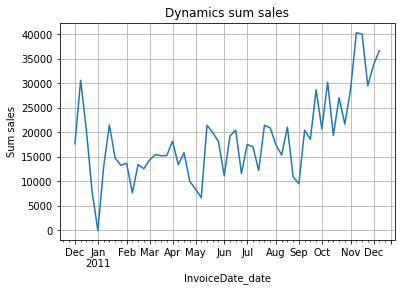

In [111]:
a = input()
din = (data.groupby(pd.Grouper(key='InvoiceDate_date', freq=a))['Sum_position'].sum())
din.plot()
plt.ylabel('Sum sales')
plt.title('Dynamics sum sales')
plt.grid()

#### 2. Сумма возвратов vs сумма поступления за период (месяц)

M


Text(0.5, 1.0, 'Return vs sales')

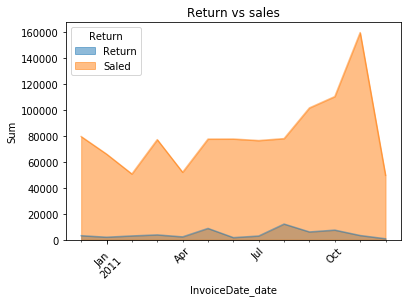

In [176]:
b = input()
df1 = (data.groupby([(pd.Grouper(key='InvoiceDate_date', freq=b)), 'Return']).sum()['Sum_positive'])

df1.unstack().plot(kind='area', rot=45, stacked=False)
plt.ylabel('Sum')
plt.title('Return vs sales')

#### 3. Рейтинг товаров по сумме дохода за 6 месяцев, 3 месяца, 1 месяц, 2 недели и 1 недели
Отсортирован

In [230]:
def date_(data):
    index=range(0,1)
    columns=['last6m', 'last3m', 'last1m','last2w', 'last1w']
    ret_df = pd.DataFrame(index=index, columns=columns)
    counter = data.shape[0]
    
    ret_df['last6m'] = data[data['InvoiceDate_date'] > max(data['InvoiceDate_date']) - dateutil.relativedelta.relativedelta(month=6)]['Sum_position'].sum()
    ret_df['last3m'] = data[data['InvoiceDate_date'] > max(data['InvoiceDate_date']) - dateutil.relativedelta.relativedelta(month=3)]['Sum_position'].sum()
    ret_df['last1m'] = data[data['InvoiceDate_date'] > max(data['InvoiceDate_date']) - dateutil.relativedelta.relativedelta(months=1)]['Sum_position'].sum()
    ret_df['last2w'] = data[data['InvoiceDate_date'] > max(data['InvoiceDate_date']) - dateutil.relativedelta.relativedelta(weeks=2)]['Sum_position'].sum()
    ret_df['last1w'] = data[data['InvoiceDate_date'] > max(data['InvoiceDate_date']) - dateutil.relativedelta.relativedelta(weeks=1)]['Sum_position'].sum()
  
    return ret_df

In [231]:
data_top = data.groupby(['StockCode']).apply(date_)

In [232]:
data_top.head()

,,last6m,last3m,last1m,last2w,last1w
StockCode,,,,,,
10002,0,0.00,0.00,3.40,3.40,3.40
10080,0,14.04,14.04,9.36,9.36,9.36
10120,0,0.21,0.21,0.21,0.21,0.21
10124A,0,0.00,0.00,0.42,0.42,0.42
10125,0,85.00,89.25,68.00,17.00,17.00


Лучшие товары

In [277]:
data_tw.sort_values('last1m', ascending=False).head(30).style.highlight_max(color = 'blue', axis=1)

,,last6m,last3m,last1m,last2w,last1w
StockCode,,,,,,
DOT,0,12016.5,15241.5,6494.61,5290.27,3342.57
22413,0,4232.37,4409.37,3949.5,3872.8,3872.8
23543,0,3278.07,3278.07,2966.85,2917.35,2900.85
22086,0,4985.69,5029.83,2663.16,1324.19,727.05
79321,0,3594.95,3732.95,2617.52,766.52,47.92
23084,0,4133.83,4297.28,2534.46,793.26,327.76
21915,0,3952.87,4045.33,2506.69,44.52,29.52
22783,0,0,2496,2496,2496,2496
23344,0,4621.52,4621.52,2495.04,186.96,76.81


Худшие товары

In [245]:
data_tw.sort_values('last1m', ascending=True).head(30).style.highlight_min(color = 'red', axis=1)

,,last6m,last3m,last1m,last2w,last1w
StockCode,,,,,,
AMAZONFEE,0,-8847.55,-8847.55,-2185.04,-2185.04,-2185.04
85232B,0,0,0,-1173.15,14.85,14.85
CRUK,0,-512.81,-512.81,-512.81,-499.8,-447.56
22656,0,0,-250,-250,-125,-125
22103,0,-182.52,-152.82,-182.52,-182.52,-182.52
D,0,-490.25,-497.45,-134.8,-122.96,-122.96
S,0,-131.23,-131.23,-131.23,-131.23,-33.05
22781,0,58.49,58.49,-116.78,-162,-162
84616,0,-1.61,58.29,-59.9,-59.9,-59.9


#### 4.1 Средний инвойс

In [263]:
data_avg = data.groupby(['InvoiceNo']).apply(date_)

In [302]:
data_avg.tail()

,,last6m,last3m,last1m,last2w,last1w
InvoiceNo,,,,,,
C581228,0,-162.00,-162.00,-162.00,-162.00,-162.00
C581229,0,-25.44,-25.44,-25.44,-25.44,-25.44
C581322,0,-2.95,-2.95,-2.95,-2.95,-2.95
C581330,0,-10.50,-10.50,-10.50,-10.50,-10.50
C581465,0,-8.50,-8.50,-8.50,-8.50,-8.50


In [279]:
data_avg.median()

last6m    10.0
last3m    23.2
last1m    33.0
last2w    33.0
last1w    33.0
dtype: float64

In [280]:
data_avg.mean()

last6m    41.675472
last3m    54.765790
last1m    67.224299
last2w    67.224299
last1w    67.224299
dtype: float64

Возьмем медианные значения среднего инвойса, так как по кол-ву и цене есть много выбросов в данных

data_avg.median().plot(kind='bar', color = 'blue', alpha=0.7)
plt.ylabel('Avg_sum')
plt.title('Avg_invoice')

#### 4.2 Средняя покупка клиента

In [290]:
def avg_(data):
    index=range(0,1)
    columns=['last6m', 'last3m', 'last1m','last2w', 'last1w', 'count_6m', 'count_3m', 'count_1m', 'count_2w', 'count_1w']
    avg_df = pd.DataFrame(index=index, columns=columns)
    counter = data.shape[0]
    
    avg_df['last6m'] = data[data['InvoiceDate_date'] > max(data['InvoiceDate_date']) - dateutil.relativedelta.relativedelta(month=6)]['Sum_position'].sum()
    avg_df['last3m'] = data[data['InvoiceDate_date'] > max(data['InvoiceDate_date']) - dateutil.relativedelta.relativedelta(month=3)]['Sum_position'].sum()
    avg_df['last1m'] = data[data['InvoiceDate_date'] > max(data['InvoiceDate_date']) - dateutil.relativedelta.relativedelta(month=1)]['Sum_position'].sum()
    avg_df['last2w'] = data[data['InvoiceDate_date'] > max(data['InvoiceDate_date']) - dateutil.relativedelta.relativedelta(weeks=2)]['Sum_position'].sum()
    avg_df['last1w'] = data[data['InvoiceDate_date'] > max(data['InvoiceDate_date']) - dateutil.relativedelta.relativedelta(weeks=1)]['Sum_position'].sum()
    
    avg_df['count_6m'] = data[data['InvoiceDate_date'] > max(data['InvoiceDate_date']) - dateutil.relativedelta.relativedelta(month=6)]['Sum_position'].count()
    avg_df['count_3m'] = data[data['InvoiceDate_date'] > max(data['InvoiceDate_date']) - dateutil.relativedelta.relativedelta(month=3)]['Sum_position'].count()
    avg_df['count_1m'] = data[data['InvoiceDate_date'] > max(data['InvoiceDate_date']) - dateutil.relativedelta.relativedelta(months=1)]['Sum_position'].count()
    avg_df['count_2w'] = data[data['InvoiceDate_date'] > max(data['InvoiceDate_date']) - dateutil.relativedelta.relativedelta(weeks=2)]['Sum_position'].count()
    avg_df['count_1w'] = data[data['InvoiceDate_date'] > max(data['InvoiceDate_date']) - dateutil.relativedelta.relativedelta(weeks=1)]['Sum_position'].count()
  
    return avg_df

In [291]:
client_avg = data.groupby(['CustomerID']).apply(avg_)

In [293]:
client_avg['avg_6m'] = client_avg['last6m'] / client_avg['count_6m']
client_avg['avg_3m'] = client_avg['last3m'] / client_avg['count_3m']
client_avg['avg_1m'] = client_avg['last1m'] / client_avg['count_1m']
client_avg['avg_2w'] = client_avg['last2w'] / client_avg['count_2w']
client_avg['avg_1w'] = client_avg['last1w'] / client_avg['count_1w']

In [304]:
client_avg.tail()

,,last6m,last3m,last1m,last2w,last1w,count_6m,count_3m,count_1m,count_2w,count_1w,avg_6m,avg_3m,avg_1m,avg_2w,avg_1w
CustomerID,,,,,,,,,,,,,,,,
18281.0,0,0.00,16.50,16.50,16.50,16.50,0,1,1,1,1,NaN,16.500000,16.500000,16.500000,16.500000
18282.0,0,22.95,22.95,22.95,22.95,22.95,1,1,1,1,1,22.950000,22.950000,22.950000,22.950000,22.950000
18283.0,0,166.56,188.35,215.30,72.20,25.16,48,58,27,18,6,3.470000,3.247414,7.974074,4.011111,4.193333
18287.0,0,43.68,158.88,158.88,43.68,43.68,2,6,2,2,2,21.840000,26.480000,79.440000,21.840000,21.840000
99999999.0,0,87761.81,114956.47,135445.90,17639.73,8312.48,7165,9684,2320,1240,684,12.248682,11.870763,58.381853,14.225589,12.152749


In [298]:
client_avg[['avg_6m','avg_3m', 'avg_1m', 'avg_2w', 'avg_1w']].sort_values('avg_1m', ascending=False).head(10).style.highlight_max(color = 'green', axis=1)

,,avg_6m,avg_3m,avg_1m,avg_2w,avg_1w
CustomerID,,,,,,
18102.0,0,588.746,580.008,12291.6,1997.53,1997.53
17949.0,0,1273.22,1506.01,6024.04,1272,1272
12415.0,0,192.208,176.783,4944.28,223.68,249.6
15195.0,0,3861,3861,3861,3861,3861
16333.0,0,1484,1181.73,3545.2,2226,2226
17450.0,0,346.949,448.464,3038.91,308.256,300.36
14680.0,0,145.707,130.798,2740.46,61.2,61.2
13694.0,0,145.543,115.133,2257.71,94.08,94.08
17857.0,0,499.829,690.089,1552.7,400.075,456.15


In [297]:
client_avg[['avg_6m','avg_3m', 'avg_1m', 'avg_2w', 'avg_1w']].sort_values('avg_1m', ascending=True).head(10).style.highlight_min(color = 'yellow', axis=1)

,,avg_6m,avg_3m,avg_1m,avg_2w,avg_1w
CustomerID,,,,,,
16029.0,0,91.5825,-208.48,-602.834,-274.752,-274.752
16716.0,0,nan,nan,-581.4,-581.4,-581.4
13564.0,0,-550.64,-550.64,-550.64,-550.64,-550.64
16163.0,0,nan,-415,-415,-415,-415
13217.0,0,-239.04,-239.04,-239.04,-239.04,-239.04
17603.0,0,-108.268,-108.268,-144.357,90.7933,90.7933
16546.0,0,-103.68,-103.68,-103.68,-103.68,-103.68
13225.0,0,177.6,-48.05,-96.1,177.6,177.6
17867.0,0,-67.6475,-59.8978,-77.0114,2.91714,2.91714


#### 5. Распределние продаж по дням недели и часам

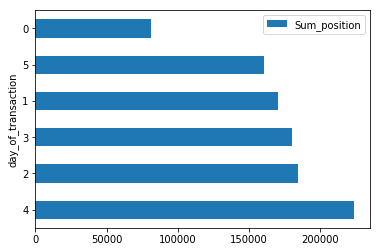

In [246]:
data.groupby(['day_of_transaction']).sum()[['Sum_position']].sort_values('Sum_position', ascending = False ).plot(kind = 'barh')

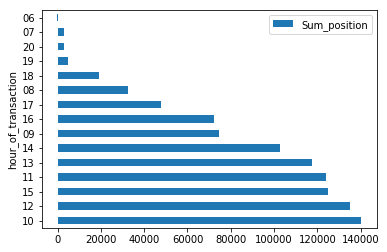

In [248]:
data.groupby(['hour_of_transaction']).sum()[['Sum_position']].sort_values('Sum_position', ascending = False ).plot(kind = 'barh')

Такое ощущение, что в этом онлайн магазине клиенты - работники организаций, так как основная масса покупок происходит в будние дни и в рабочие часы